In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
from pathlib import Path

In [22]:
model = 'SVAE_v2_29x29pixels_e50'
loc = 'best'
#os.chdir('../../Scripts')

In [23]:
def model_eval(model = model):
    path = '../saved_models/'
    model = model
    
       
    model_dir = os.path.join(path,model)
    os.chdir(model_dir)
    
    model_eval_data = dict()
    
    for file in os.listdir():
        
        name = file.split('.')[0]
        
        if name.split('_')[0] == 'cmt':
            model_eval_data[name] = np.loadtxt(file, delimiter = ',').astype(int)
        
        elif name.split('_')[0] == 'hist':
            model_eval_data[name] = np.loadtxt(file)
            
        elif 'loss' in file:
            model_eval_data[name] = np.loadtxt(file)
    
    plot_model_eval(model_eval_data = model_eval_data, model = model)
    plot_model_loss(model_eval_data = model_eval_data, model = model)
    plot_confusion_matrix(cm = model_eval_data['cmt_anomaly_t'], classes = names_anomaly, 
                          name = 'anomaly_train')
    plot_confusion_matrix(cm = model_eval_data['cmt_anomaly_v'], classes = names_anomaly, 
                          name = 'anomaly_val')
    plot_confusion_matrix(cm = model_eval_data['cmt_anatomy_t'], classes = names_anatomy, 
                          name = 'anatomy_train')
    plot_confusion_matrix(cm = model_eval_data['cmt_anatomy_v'], classes = names_anatomy, 
                          name = 'anatomy_val')

    os.chdir('../../../Scripts')
    
    return model_eval_data

In [24]:
def plot_model_eval(model_eval_data, model = model):
    
    hist_anomaly_train = model_eval_data['hist_anomaly_train']
    hist_anomaly_val = model_eval_data['hist_anomaly_val']
    hist_anatomy_train = model_eval_data['hist_anatomy_train']
    hist_anatomy_val = model_eval_data['hist_anatomy_val']
    
    Path('Plots').mkdir(parents=True, exist_ok=True)
    os.chdir('Plots')
    
    plt.figure(figsize=(8,8))
    plt.plot(hist_anomaly_train, marker = 'x', color = 'navy', label = 'Anomaly train');
    plt.plot(hist_anomaly_val, marker = 'x', color = 'blue', label = 'Anomaly validation');
    plt.plot(hist_anatomy_train, marker = 'x', color = 'darkred', label = 'Anatomy train');
    plt.plot(hist_anatomy_val, marker = 'x', color = 'red', label = 'Anatomy validation');
    plt.xlabel('Epochs');
    plt.ylabel('F1-score');
    plt.legend(loc = 'best');
    plt.title(model);
    plt.savefig(model + '_f1_score')

In [25]:
def plot_confusion_matrix(cm, classes, name, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(name)
    plt.tight_layout()
    plt.savefig(name + 'cm')
    
names_anatomy = (
    'Elbow'
    ,'Shoulder'
    ,'Finger'
    ,'Forearm'
    ,'Hand'
    ,'Humerus'
    ,'Wrist'
)
names_anomaly = (
    'Normal', 
    'Outlier'
)


In [26]:
def plot_model_loss(model_eval_data, model):
    
    epoch_loss_train = model_eval_data['train_loss']
    epoch_loss_val = model_eval_data['valid_loss']
    
    plt.figure(figsize=(8,8))
    plt.plot(epoch_loss_train, marker = 'x', color = 'darkred', label = 'Training loss');
    plt.plot(epoch_loss_val, marker = 'x', color = 'red', label = 'Validation loss');
    plt.xlabel('Epochs');
    plt.ylabel('Loss');
    plt.legend(loc = 'best');
    plt.title(model);
    plt.savefig(model + '_loss')
    
    

Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


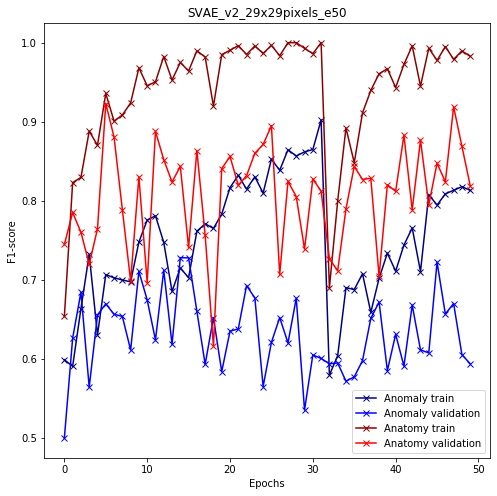

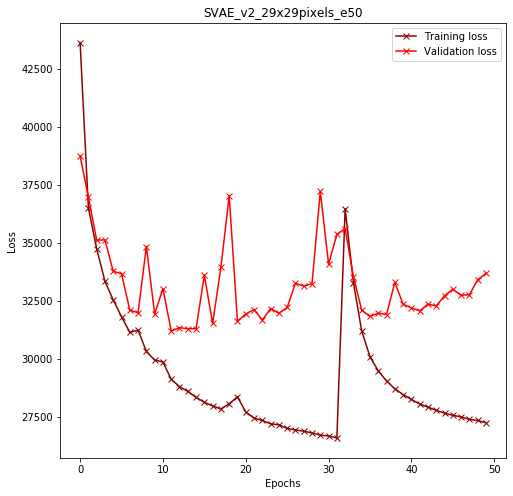

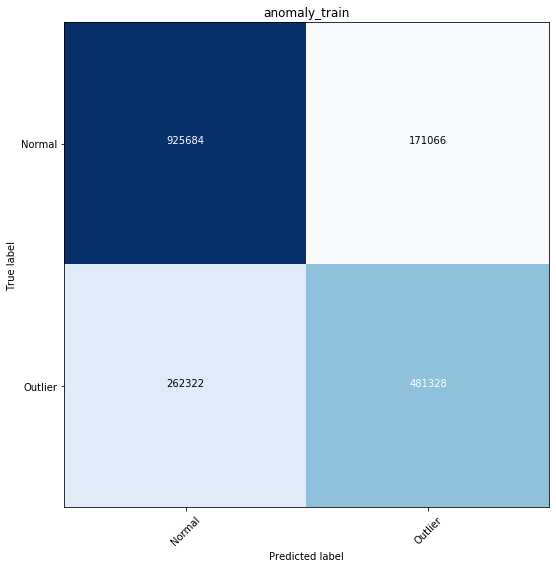

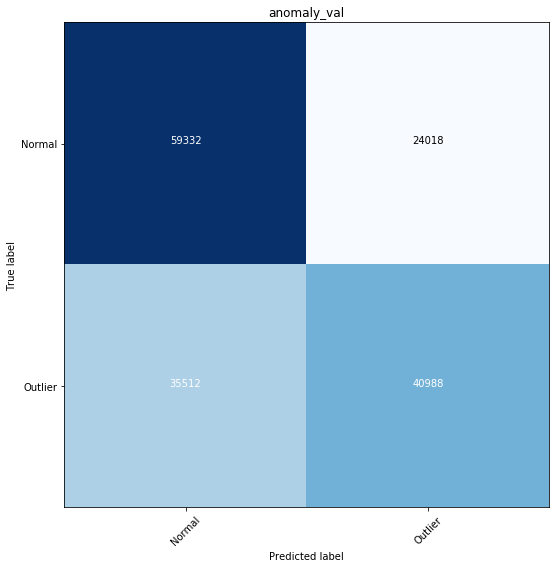

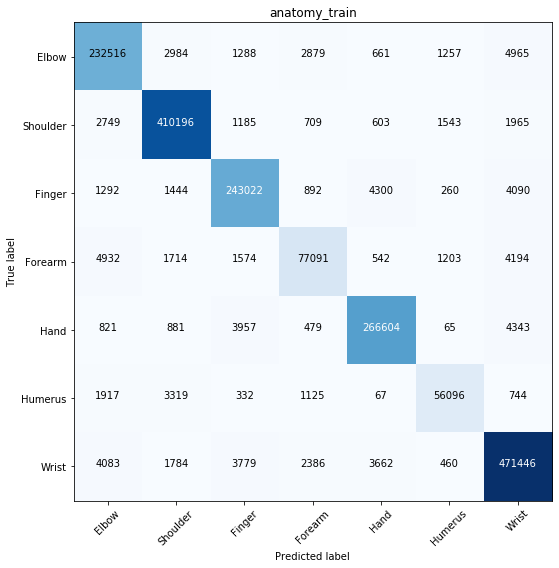

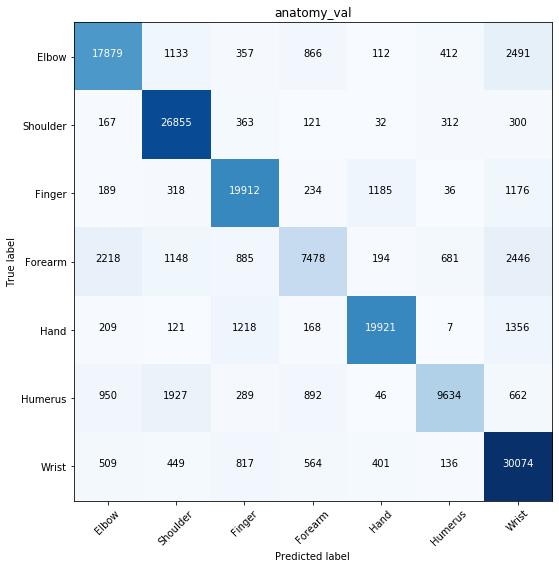

In [27]:
model_eval_data = model_eval();

In [15]:
os.getcwd()

'/home/piet/Desktop/DTU/Bachelor/saved_models/SVAE_v2_DenseNet_e100'

In [16]:
os.chdir('../../Scripts')

In [8]:
model_eval_data['hist_anomaly_train']

NameError: name 'model_eval_data' is not defined

In [ ]:
model_eval_data